In [2]:
import json
import pandas as pd
from plotnine import *
from util import get_qr_array_size

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
results = {'alpha': [], 'block_size': [], 'color_space': [], 'depth': [], 'code': [], 'channels': [], 'recovery_rate': [], 'throughput': []}


for name in ['simple', 'qr']:
    with open('results/sweep_{}.txt'.format(name)) as f:
        for line in f.readlines():
            r = json.loads(line)
            p = r['params']
            if 'version' in p:
                p['block_size'] = int(600 // get_qr_array_size({'version':p['version']}))
            results['code'].append(name)
            results['alpha'].append(p['alpha'])
            results['depth'].append(p['depth'])
            results['channels'].append(p['channels'])
            results['block_size'].append(p['block_size'])
            results['color_space'].append(p['color_space'])
            results['recovery_rate'].append(r['recovery_rate'])
            results['throughput'].append(r['throughput'])
        
results = pd.DataFrame(results)
results.channels = results.channels.apply(lambda x: len(x))

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/alpha_block_recovery.png
  warn('Filename: {}'.format(filename))


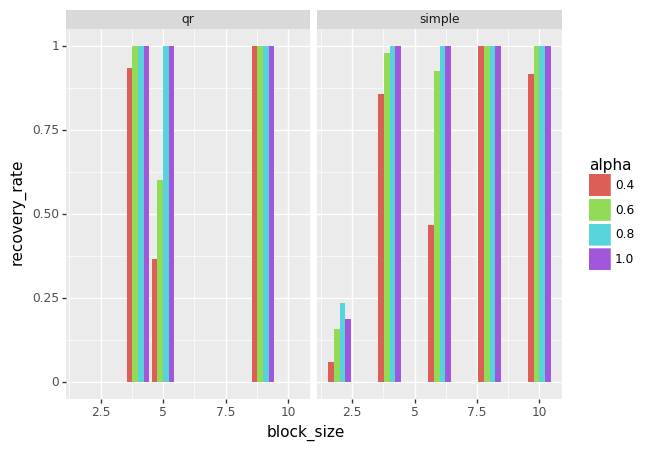

<ggplot: (-9223363278416173010)>

In [7]:
rs = results.groupby(['alpha', 'code', 'block_size'])[['alpha', 'code', 'block_size', 'recovery_rate']]
rs = rs.max().reset_index()
rs.alpha = rs.alpha.apply(lambda x: str(x))
p = ggplot(rs, aes(x='block_size', y='recovery_rate', fill='alpha')) \
+ geom_bar(stat='identity', position='dodge') \
+ facet_wrap('code')
p.save('figures/alpha_block_recovery.png')
p

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/alpha_block_tp.png
  warn('Filename: {}'.format(filename))


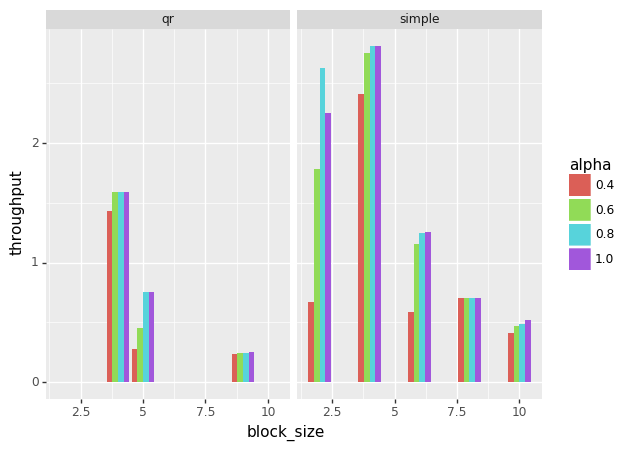

<ggplot: (8758438600929)>

In [8]:
rs = results.groupby(['alpha', 'code', 'block_size'])[['alpha', 'code', 'block_size', 'throughput']]
rs = rs.max().reset_index()
rs.alpha = rs.alpha.apply(lambda x: str(x))
p = ggplot(rs, aes(x='block_size', y='throughput', fill='alpha')) \
+ geom_bar(stat='identity', position='dodge') \
+ facet_wrap('code')
p.save('figures/alpha_block_tp.png')
p

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/depth_recovery.png
  warn('Filename: {}'.format(filename))


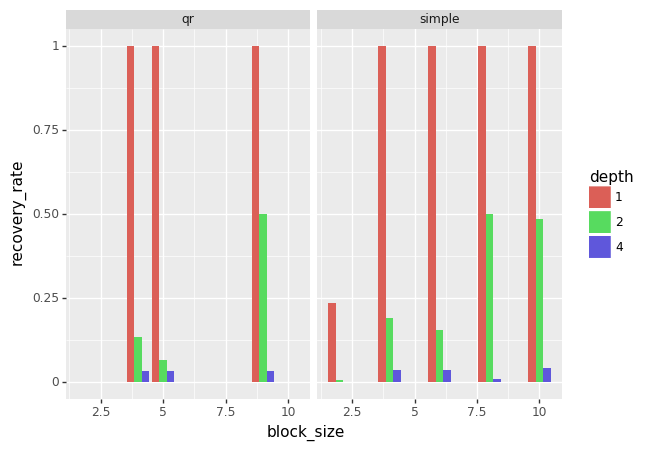

<ggplot: (-9223363278416324769)>

In [9]:
rs = results.groupby(['depth', 'code', 'block_size'])[['depth', 'code', 'block_size', 'recovery_rate']]
rs = rs.max().reset_index()
rs.depth = rs.depth.apply(lambda x: str(x))
p = ggplot(rs, aes(x='block_size', y='recovery_rate', fill='depth')) \
+ geom_bar(stat='identity', position='dodge') \
+ facet_wrap('code')
p.save('figures/depth_recovery.png')
p

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/block_recovery.png
  warn('Filename: {}'.format(filename))


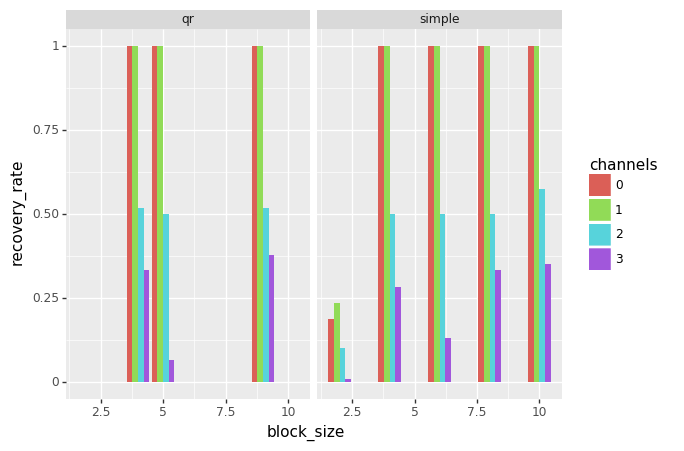

<ggplot: (-9223363278351103635)>

In [11]:
rs = results.groupby(['channels', 'code', 'block_size'])[['channels', 'code', 'block_size', 'recovery_rate']]
rs = rs.max().reset_index()
rs.channels = rs.channels.apply(lambda x: str(x))
p = ggplot(rs, aes(x='block_size', y='recovery_rate', fill='channels')) \
+ geom_bar(stat='identity', position='dodge') \
+ facet_wrap('code')
p.save('figures/block_recovery.png')
p

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/block_tp.png
  warn('Filename: {}'.format(filename))


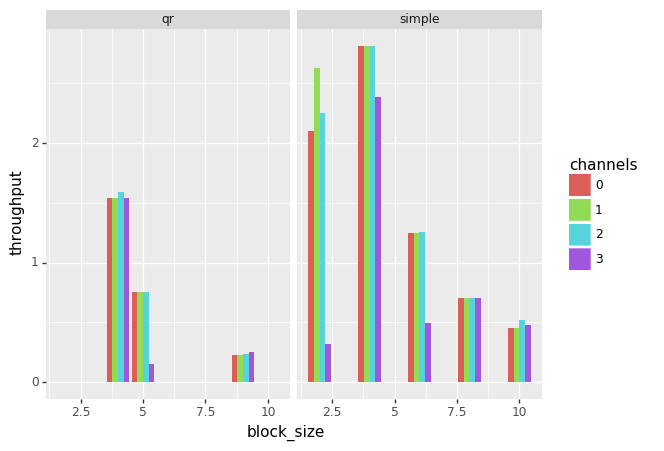

<ggplot: (8758438704546)>

In [12]:
rs = results.groupby(['channels', 'code', 'block_size'])[['channels', 'code', 'block_size', 'throughput']]
rs = rs.max().reset_index()
rs.channels = rs.channels.apply(lambda x: str(x))
p = ggplot(rs, aes(x='block_size', y='throughput', fill='channels')) \
+ geom_bar(stat='identity', position='dodge') \
+ facet_wrap('code')
p.save('figures/block_tp.png')
p

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/measure_baseline.png
  warn('Filename: {}'.format(filename))


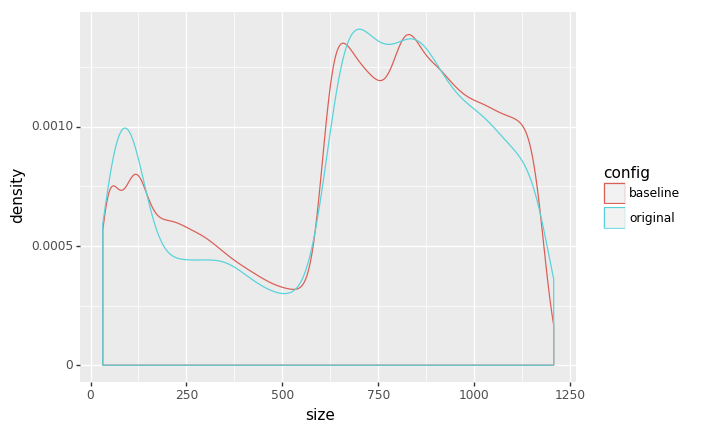

<ggplot: (-9223363278416708464)>

In [32]:
files = [
    ('measurement_2/alpha0', 'original'),
    ('measurement_2/baseline_wifi', 'baseline')
]
packet_size0 = {'config': [] , 'size': []}
for file, name in files:
    file_dir = 'results/skype_packet_recordings/{}.txt'.format(file)
    for line in open(file_dir).readlines():
        try:
            size = int(line.split('Len=')[1])
            packet_size0['config'].append(name)
            packet_size0['size'].append(size)
        except:
            pass
packet_size0 = pd.DataFrame(packet_size0)
p = ggplot(packet_size0) + geom_density(aes(x='size', color='config'))
p.save('figures/measure_baseline.png')
p

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: measure_v40.png
  warn('Filename: {}'.format(filename))


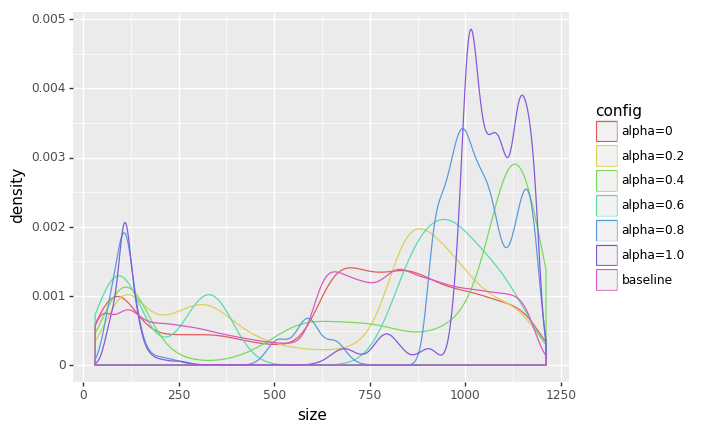

<ggplot: (8758438080611)>

In [13]:
files = [
    ('measurement_2/alpha0', 'alpha=0'),
    ('measurement_2/alpha2', 'alpha=0.2'),
    ('measurement_2/alpha4', 'alpha=0.4'),
    ('measurement_2/alpha6', 'alpha=0.6'),
    ('measurement_2/alpha8', 'alpha=0.8'),
    ('measurement_2/alpha10', 'alpha=1.0'),
    ('measurement_2/baseline_wifi', 'baseline'
]
packet_size0 = {'config': [] , 'size': []}
for file, name in files:
    file_dir = 'results/skype_packet_recordings/{}.txt'.format(file)
    for line in open(file_dir).readlines():
        try:
            size = int(line.split('Len=')[1])
            packet_size0['config'].append(name)
            packet_size0['size'].append(size)
        except:
            pass
packet_size0 = pd.DataFrame(packet_size0)
p = ggplot(packet_size0) + geom_density(aes(x='size', color='config'))
p.save('figures/measure_v40.png')
p

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/measure_versions.png
  warn('Filename: {}'.format(filename))


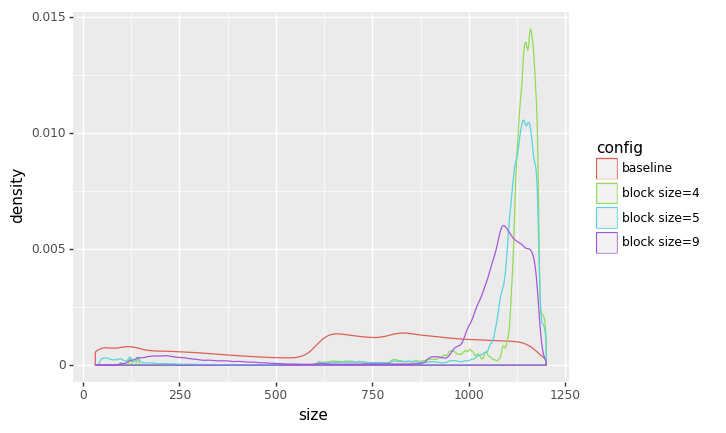

<ggplot: (8758438655552)>

In [42]:
files = [
    ('version_and_ycbcr/v10', 'block size=9'),
    ('version_and_ycbcr/v20', 'block size=5'),
    ('version_and_ycbcr/v30', 'block size=4'),
    ('measurement_2/baseline_wifi', 'baseline')
]
packet_size1 = {'config': [] , 'size': []}
for file, name in files:
    file_dir = 'results/skype_packet_recordings/{}.txt'.format(file)
    for line in open(file_dir).readlines():
        try:
            size = int(line.split('Len=')[1])
            packet_size1['config'].append(name)
            packet_size1['size'].append(size)
            packet_size1['weight'].append(weight)
        except:
            pass
packet_size1 = pd.DataFrame(packet_size1)
p = ggplot(packet_size1) + geom_density(aes(x='size', color='config')) 
p.save('figures/measure_versions.png')
p

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/measure_v30.png
  warn('Filename: {}'.format(filename))


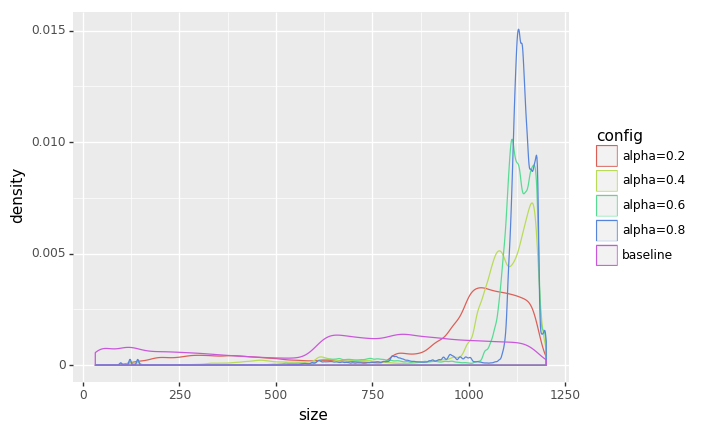

<ggplot: (8758438707965)>

In [39]:
files = [
    ('measurement_v30/v30alpha.2', 'alpha=0.2'),
    ('measurement_v30/v30alpha.4', 'alpha=0.4'),
    ('measurement_v30/v30alpha.6', 'alpha=0.6'),
    ('measurement_v30/v30alpha.8', 'alpha=0.8'),
    ('measurement_2/baseline_wifi', 'baseline')
]
packet_size2 = {'config': [] , 'size': []}
for file, name in files:
    file_dir = 'results/skype_packet_recordings/{}.txt'.format(file)
    for line in open(file_dir).readlines():
        try:
            size = int(line.split('Len=')[1])
            packet_size2['config'].append(name)
            packet_size2['size'].append(size)
            packet_size2['weight'].append(weight)
        except:
            pass
packet_size2 = pd.DataFrame(packet_size2)
p = ggplot(packet_size2) + geom_density(aes(x='size', color='config')) 
p.save('figures/measure_v30.png')
p

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/measure_qr_simple.png
  warn('Filename: {}'.format(filename))


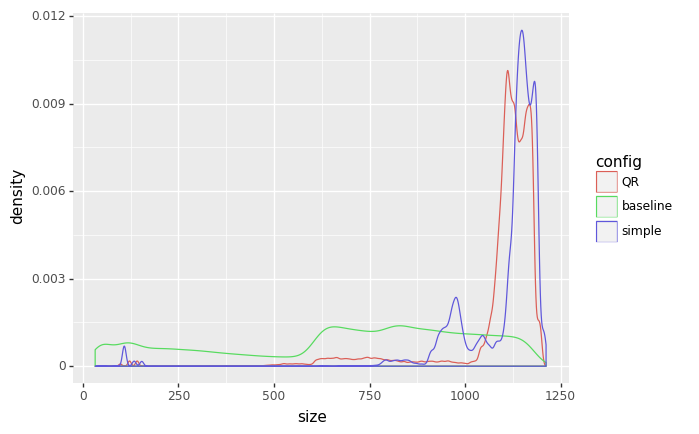

<ggplot: (8758436597014)>

In [40]:
files = [
    ('measurement_v30/v30alpha.6', 'QR'),
    ('measurement_v30/simplealpha.6', 'simple'),
    ('measurement_2/baseline_wifi', 'baseline')
]
packet_size2 = {'config': [] , 'size': []}
for file, name in files:
    file_dir = 'results/skype_packet_recordings/{}.txt'.format(file)
    for line in open(file_dir).readlines():
        try:
            size = int(line.split('Len=')[1])
            packet_size2['config'].append(name)
            packet_size2['size'].append(size)
            packet_size2['weight'].append(weight)
        except:
            pass
packet_size2 = pd.DataFrame(packet_size2)
p = ggplot(packet_size2) + geom_density(aes(x='size', color='config')) 
p.save('figures/measure_qr_simple.png')
p

/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/fs/clip-ml/shifeng/anaconda3/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: figures/measure_rgb_yuv.png
  warn('Filename: {}'.format(filename))


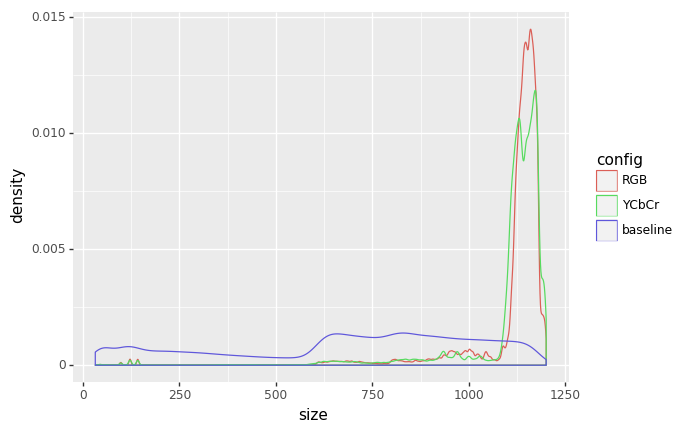

<ggplot: (8758436753542)>

In [44]:
files = [
    ('version_and_ycbcr/v30', 'RGB'),
    ('version_and_ycbcr/ycbcr', 'YCbCr'),
    ('measurement_2/baseline_wifi', 'baseline')
]
packet_size2 = {'config': [] , 'size': []}
for file, name in files:
    file_dir = 'results/skype_packet_recordings/{}.txt'.format(file)
    for line in open(file_dir).readlines():
        try:
            size = int(line.split('Len=')[1])
            packet_size2['config'].append(name)
            packet_size2['size'].append(size)
            packet_size2['weight'].append(weight)
        except:
            pass
packet_size2 = pd.DataFrame(packet_size2)
p = ggplot(packet_size2) + geom_density(aes(x='size', color='config')) 
p.save('figures/measure_rgb_yuv.png')
p